# Transmon readout

In [1]:
import numpy as np
import scipy as sc
import scipy.special as sp
import scipy.constants as pyc

from bfqcircuits.core  import resonator_transmon as rtrm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

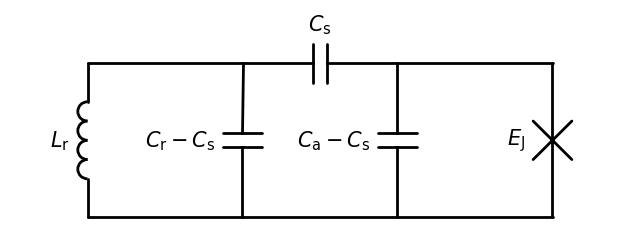

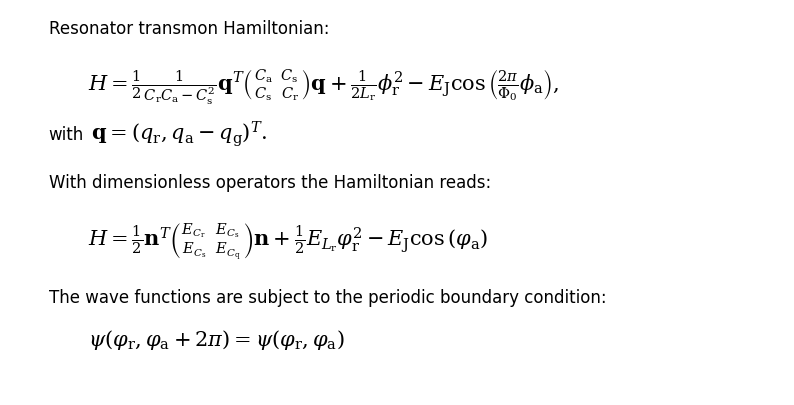

In [2]:
resmon = rtrm.ResonatorTransmon()
fig = resmon.draw_circuit()
fig = resmon.show_formulas()

In [3]:
Lr = 10.0e-9
Cr = 50.0e-15

Ca = 80.0e-15
Ej = 20.0

Cs = 1.0e-15
ng  = 0.0

Na = 25
Nr = 20

resmon.set_parameters(Lr=Lr, Cr=Cr, Ca=Ca, Cs=Cs, Ej=Ej, ng=ng, Na=Na, Nr=Nr)

# whenever inductuctances and capcitances are changed the Hamiltonian parameters have to be recalculated
resmon.calc_hamiltonian_parameters()

print(resmon.__repr__())

Lr = 1.0000e-08
Cr = 5.0000e-14
Ca = 8.0000e-14
Cs = 1.0000e-15

Elr = 1.6346e+01
Ecr = 3.1000e+00
Eca = 1.9375e+00
Ecs = 3.8750e-02
Ej = 2.0000e+01

ℏωᵣ = 7.1185e+00
ℏωₐ = 6.2250e+00
ℏg = 5.2626e-02
Ej / Ec = 1.0323e+01

flux_zpf = [[7.4266e-02, 0.0000e+00], [0.0000e+00, 6.2785e-02]]
charge_zpf = [[1.0715e+00, 0.0000e+00], [0.0000e+00, 1.2675e+00]]



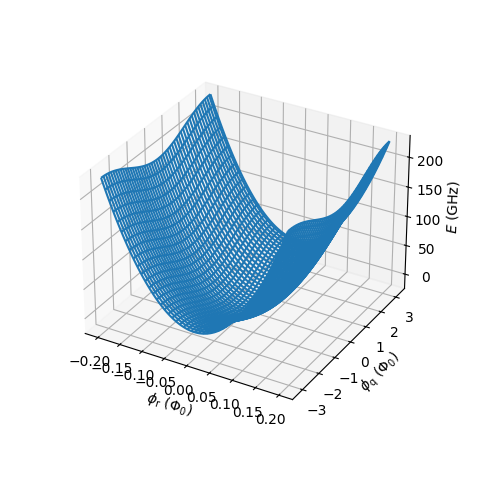

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

resmon.plot_potential(ax, x_range=0.2)

ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

In [5]:
resmon.diagonalize_hamiltonian()
resmon.substract_groundstate_energy()
resmon.E[:5]

array([ 0.        ,  5.96971813,  7.12062498, 11.67229337, 13.08930995])

## Parameter sweeps
- the program is designed for 1D sweeps of the circuit parameters
- for the transmon certainly most important is the offset charge sweep

### Offset charge sweep

In [6]:
resmon.sweep_offset_charge(np.linspace(-0.5, 0.5, 101))
resmon.substract_groundstate_energy_sweep()

Resonator frequency: 7.120624980216065
Maximum plotted energy: 78.32680068365917


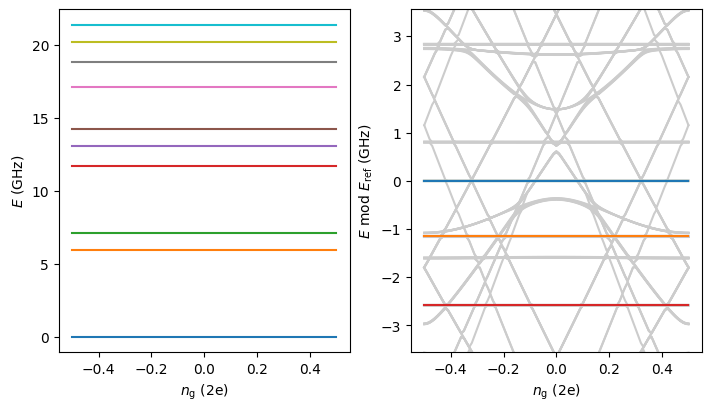

In [7]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)

ax = fig.add_subplot(121)
resmon.plot_energy_sweep(ax, np.arange(10))
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")


ax = fig.add_subplot(122)

# resonator frequency at even charge
fr = resmon.E_sweep[2, 50] - resmon.E_sweep[0, 50]
print("Resonator frequency:", fr)

E_max = resmon.plot_energy_sweep_wrapped(ax, 5, 100, fr)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")

plt.show()

### Sorting energies

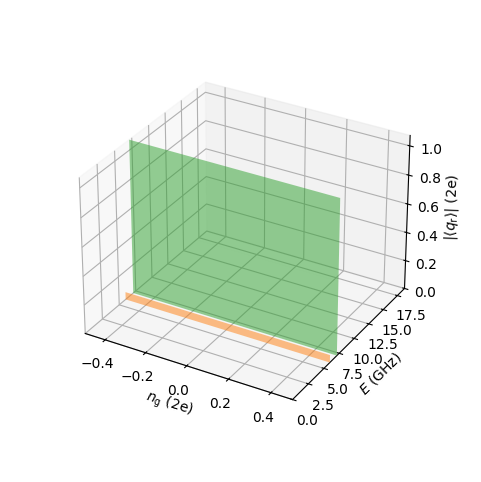

In [8]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(projection="3d")

# this shows how the resonator states are identified
resmon.plot_res_dipole_to_various_states_sweep(ax, 0, np.arange(8), dipole="charge")

ax.set_box_aspect(aspect=None, zoom=0.8)

ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")

plt.show()

In [9]:
# The parameter dE is the allowed frequency variation of the resonator photons when climbing up the excitation ladder.
# A large value for dE slows down the sorting as more resonator charge dipole moments to all the states within dE have to be calculated.
# If no next state is found within dE, E_trust is set to the current state energy

dE = 0.1

resmon.associate_levels_sweep(dE)
print("Successfully sorted up to {:.2f} GHz".format(resmon.E_trust))

Successfully sorted up to 150.21 GHz


Resonator frequency: 7.120624980216065
Maximum transmon state plotted: 18
Maximum resonator state plotted: 8
Maximum eigenstate plotted: 149
Maximum plotted energy: 98.48217993201328


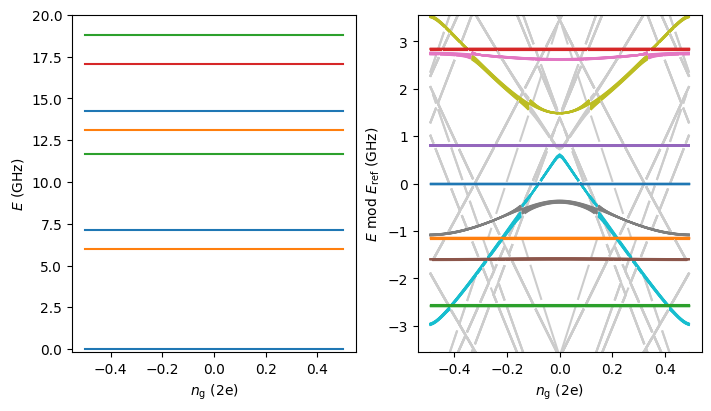

In [10]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(121)

resmon.plot_sorted_energy_sweep(ax, np.arange(5), np.arange(5))
ax.set_ylim(-0.2, 20)
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")


fr = resmon.E_sweep[2, 50] - resmon.E_sweep[0, 50]
print("Resonator frequency:", fr)

ax = fig.add_subplot(122)
nq_max, nr_max, n_max, E_max = resmon.plot_sorted_energy_sweep_wrapped(ax, fr, na_max=20, nr_max=8, n=150, gap=True)
print("Maximum transmon state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")

plt.show()

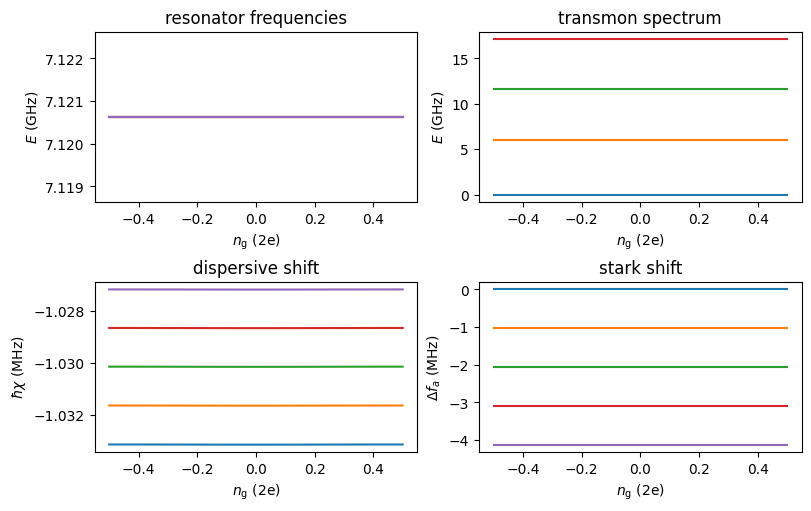

In [11]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
ax = fig.add_subplot(221)

resmon.derive_spectrum_properties_sweep()

ax.set_title("resonator frequencies")
resmon.plot_resonator_transitions_sweep(ax, np.arange(1), np.arange(5))
ax.set_ylim(fr - 2e-3, fr + 2e-3)
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("transmon spectrum")
resmon.plot_spectrum_sweep(ax, np.arange(4), np.arange(1))
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
resmon.plot_chi_sweep(ax, [1], np.arange(5))
#ax.set_ylim(-2, 0)
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")
ax.set_ylabel(r"$\hbar\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
resmon.plot_stark_shift_sweep(ax, [1], np.arange(5))
#ax.set_ylim(-20, 20)
ax.set_xlabel(r"$n_\mathrm{g}$ (2e)")
ax.set_ylabel(r"$\Delta f_a$ (MHz)")

plt.show()

## High power readout behaviour

In [12]:
resmon.set_parameters(ng=0.0, Na=41, Nr=200)  # this runs for 5min
resmon.diagonalize_hamiltonian()

In [13]:
dE = 0.1
resmon.associate_levels(dE, na_max=20)
print(resmon.E_trust)

resmon.derive_spectrum_properties()

1402.3245224893346


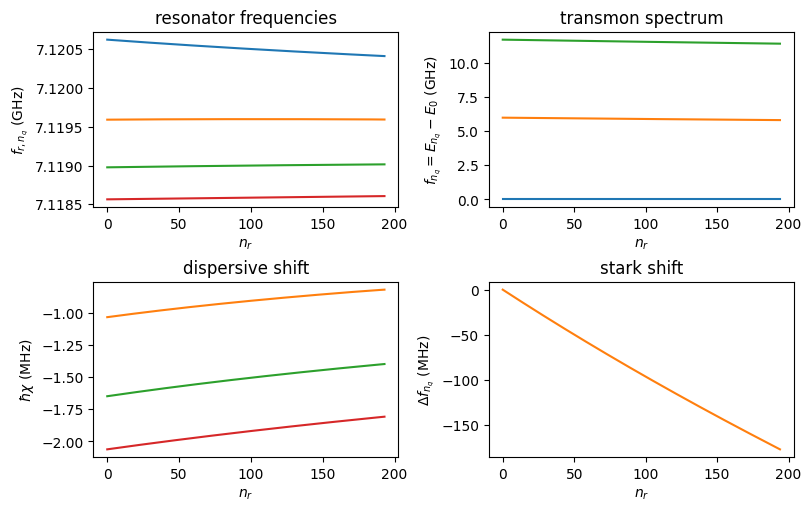

In [14]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True) 

# the last few resonator states are usually not converged
dnr = 5

ax = fig.add_subplot(221)
ax.set_title("resonator frequencies")
ax.plot(resmon.resonator_transitions[0, :-dnr])  # resonator frequency with fluxonium in ground state
ax.plot(resmon.resonator_transitions[1, :-dnr])  # resonator frequency with fluxonium in first excited state
ax.plot(resmon.resonator_transitions[2, :-dnr])  # resonator frequency with fluxonium in second excited state
ax.plot(resmon.resonator_transitions[3, :-dnr])  # resonator frequency with fluxonium in second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{r, n_q}$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("transmon spectrum")
ax.plot(resmon.atom_spectrum[0, :-dnr], color="C0")  # ground state
ax.plot(resmon.atom_spectrum[1, :-dnr], color="C1")  # first excited state
ax.plot(resmon.atom_spectrum[2, :-dnr], color="C2")  # second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{n_q} = E_{n_q} - E_0$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
ax.plot(1e3 * resmon.chi[1, :-dnr], color="C1")   # first excited state
ax.plot(1e3 * resmon.chi[2, :-dnr], color="C2")   # second excited state
ax.plot(1e3 * resmon.chi[3, :-dnr], color="C3")   # second excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\hbar\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
ax.plot(1e3 * resmon.atom_stark_shift[1, :-dnr], color="C1") 
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\Delta f_{n_q}$ (MHz)")

plt.show()

## More...
- calculate dipole moments, ...
- get creative with the code and adapt it to your needs